<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9734312	total: 52.7ms	remaining: 52.6s
1:	learn: 0.9409367	total: 53.1ms	remaining: 26.5s
2:	learn: 0.9134930	total: 53.4ms	remaining: 17.7s
3:	learn: 0.8824956	total: 53.8ms	remaining: 13.4s
4:	learn: 0.8536451	total: 54.2ms	remaining: 10.8s
5:	learn: 0.8276422	total: 54.8ms	remaining: 9.07s
6:	learn: 0.8015432	total: 55ms	remaining: 7.8s
7:	learn: 0.7754357	total: 55.5ms	remaining: 6.88s
8:	learn: 0.7498367	total: 55.9ms	remaining: 6.16s
9:	learn: 0.7265940	total: 56.4ms	remaining: 5.59s
10:	learn: 0.7051486	total: 56.9ms	remaining: 5.11s
11:	learn: 0.6840147	total: 57.2ms	remaining: 4.71s
12:	learn: 0.6621845	total: 57.7ms	remaining: 4.38s
13:	learn: 0.6417900	total: 59.4ms	remaining: 4.19s
14:	learn: 0.6207801	total: 59.7ms	remaining: 3.92s
15:	learn: 0.6027975	total: 59.9ms	remaining: 3.68s
16:	learn: 0.5844022	total: 60.1ms	remaining: 3.48s
17:	learn: 0.5669270	total: 60.4ms	remaining: 3.29s
18:	learn: 0.5494725	total: 60.6ms	remaining: 3

23:	learn: 0.4734133	total: 66ms	remaining: 2.69s
24:	learn: 0.4597459	total: 66.7ms	remaining: 2.6s
25:	learn: 0.4456233	total: 67.8ms	remaining: 2.54s
26:	learn: 0.4339940	total: 68.2ms	remaining: 2.46s
27:	learn: 0.4212269	total: 68.7ms	remaining: 2.38s
28:	learn: 0.4108831	total: 69.1ms	remaining: 2.31s
29:	learn: 0.3995579	total: 69.4ms	remaining: 2.24s
30:	learn: 0.3873654	total: 69.9ms	remaining: 2.19s
31:	learn: 0.3764799	total: 70.4ms	remaining: 2.13s
32:	learn: 0.3656958	total: 70.9ms	remaining: 2.08s
33:	learn: 0.3550787	total: 71.4ms	remaining: 2.03s
34:	learn: 0.3450449	total: 72ms	remaining: 1.98s
35:	learn: 0.3359524	total: 72.4ms	remaining: 1.94s
36:	learn: 0.3257959	total: 72.9ms	remaining: 1.9s
37:	learn: 0.3166004	total: 73.4ms	remaining: 1.86s
38:	learn: 0.3090307	total: 73.8ms	remaining: 1.82s
39:	learn: 0.2995858	total: 74.3ms	remaining: 1.78s
40:	learn: 0.2915372	total: 74.8ms	remaining: 1.75s
41:	learn: 0.2844554	total: 75.2ms	remaining: 1.72s
42:	learn: 0.27701

100:	learn: 0.0798527	total: 144ms	remaining: 1.28s
101:	learn: 0.0786544	total: 144ms	remaining: 1.27s
102:	learn: 0.0773587	total: 144ms	remaining: 1.26s
103:	learn: 0.0763186	total: 148ms	remaining: 1.27s
104:	learn: 0.0750084	total: 148ms	remaining: 1.26s
105:	learn: 0.0743435	total: 149ms	remaining: 1.26s
106:	learn: 0.0730756	total: 150ms	remaining: 1.25s
107:	learn: 0.0720006	total: 150ms	remaining: 1.24s
108:	learn: 0.0708415	total: 151ms	remaining: 1.23s
109:	learn: 0.0702583	total: 151ms	remaining: 1.22s
110:	learn: 0.0695260	total: 156ms	remaining: 1.25s
111:	learn: 0.0685427	total: 157ms	remaining: 1.24s
112:	learn: 0.0678513	total: 157ms	remaining: 1.23s
113:	learn: 0.0667855	total: 157ms	remaining: 1.22s
114:	learn: 0.0657204	total: 159ms	remaining: 1.22s
115:	learn: 0.0651845	total: 161ms	remaining: 1.23s
116:	learn: 0.0644051	total: 163ms	remaining: 1.23s
117:	learn: 0.0641898	total: 163ms	remaining: 1.22s
118:	learn: 0.0633213	total: 164ms	remaining: 1.21s
119:	learn: 

180:	learn: 0.0420091	total: 191ms	remaining: 864ms
181:	learn: 0.0418893	total: 191ms	remaining: 860ms
182:	learn: 0.0417471	total: 192ms	remaining: 855ms
183:	learn: 0.0415758	total: 192ms	remaining: 851ms
184:	learn: 0.0414365	total: 194ms	remaining: 856ms
185:	learn: 0.0412737	total: 195ms	remaining: 854ms
186:	learn: 0.0410014	total: 196ms	remaining: 850ms
187:	learn: 0.0408797	total: 196ms	remaining: 846ms
188:	learn: 0.0407170	total: 196ms	remaining: 842ms
189:	learn: 0.0405455	total: 196ms	remaining: 838ms
190:	learn: 0.0404341	total: 197ms	remaining: 833ms
191:	learn: 0.0403213	total: 197ms	remaining: 829ms
192:	learn: 0.0401407	total: 198ms	remaining: 827ms
193:	learn: 0.0399909	total: 199ms	remaining: 825ms
194:	learn: 0.0398178	total: 199ms	remaining: 822ms
195:	learn: 0.0396877	total: 200ms	remaining: 818ms
196:	learn: 0.0394946	total: 202ms	remaining: 822ms
197:	learn: 0.0393492	total: 202ms	remaining: 819ms
198:	learn: 0.0391088	total: 203ms	remaining: 818ms
199:	learn: 

345:	learn: 0.0263497	total: 280ms	remaining: 530ms
346:	learn: 0.0262953	total: 281ms	remaining: 528ms
347:	learn: 0.0262364	total: 281ms	remaining: 526ms
348:	learn: 0.0261846	total: 281ms	remaining: 525ms
349:	learn: 0.0261167	total: 282ms	remaining: 523ms
350:	learn: 0.0260365	total: 282ms	remaining: 521ms
351:	learn: 0.0259865	total: 282ms	remaining: 520ms
352:	learn: 0.0259251	total: 283ms	remaining: 518ms
353:	learn: 0.0258905	total: 283ms	remaining: 516ms
354:	learn: 0.0258579	total: 283ms	remaining: 515ms
355:	learn: 0.0258094	total: 283ms	remaining: 513ms
356:	learn: 0.0257632	total: 284ms	remaining: 511ms
357:	learn: 0.0256864	total: 284ms	remaining: 509ms
358:	learn: 0.0256573	total: 284ms	remaining: 508ms
359:	learn: 0.0255983	total: 286ms	remaining: 508ms
360:	learn: 0.0255499	total: 286ms	remaining: 507ms
361:	learn: 0.0254915	total: 287ms	remaining: 505ms
362:	learn: 0.0254481	total: 287ms	remaining: 504ms
363:	learn: 0.0253534	total: 287ms	remaining: 502ms
364:	learn: 

454:	learn: 0.0219350	total: 326ms	remaining: 391ms
455:	learn: 0.0218809	total: 327ms	remaining: 390ms
456:	learn: 0.0218195	total: 327ms	remaining: 388ms
457:	learn: 0.0217925	total: 327ms	remaining: 387ms
458:	learn: 0.0217634	total: 327ms	remaining: 386ms
459:	learn: 0.0217416	total: 329ms	remaining: 386ms
460:	learn: 0.0217205	total: 330ms	remaining: 386ms
461:	learn: 0.0217040	total: 330ms	remaining: 385ms
462:	learn: 0.0216754	total: 331ms	remaining: 384ms
463:	learn: 0.0216523	total: 333ms	remaining: 384ms
464:	learn: 0.0216022	total: 333ms	remaining: 384ms
465:	learn: 0.0215836	total: 334ms	remaining: 382ms
466:	learn: 0.0215669	total: 334ms	remaining: 381ms
467:	learn: 0.0215350	total: 334ms	remaining: 380ms
468:	learn: 0.0215016	total: 334ms	remaining: 379ms
469:	learn: 0.0214423	total: 335ms	remaining: 378ms
470:	learn: 0.0214212	total: 335ms	remaining: 376ms
471:	learn: 0.0213915	total: 335ms	remaining: 375ms
472:	learn: 0.0213697	total: 336ms	remaining: 375ms
473:	learn: 

659:	learn: 0.0175112	total: 416ms	remaining: 214ms
660:	learn: 0.0175056	total: 419ms	remaining: 215ms
661:	learn: 0.0174724	total: 419ms	remaining: 214ms
662:	learn: 0.0174343	total: 420ms	remaining: 213ms
663:	learn: 0.0174166	total: 420ms	remaining: 212ms
664:	learn: 0.0173964	total: 420ms	remaining: 212ms
665:	learn: 0.0173912	total: 423ms	remaining: 212ms
666:	learn: 0.0173720	total: 424ms	remaining: 212ms
667:	learn: 0.0173464	total: 425ms	remaining: 211ms
668:	learn: 0.0173258	total: 425ms	remaining: 210ms
669:	learn: 0.0173140	total: 426ms	remaining: 210ms
670:	learn: 0.0172949	total: 426ms	remaining: 209ms
671:	learn: 0.0172784	total: 427ms	remaining: 208ms
672:	learn: 0.0172513	total: 428ms	remaining: 208ms
673:	learn: 0.0172224	total: 429ms	remaining: 207ms
674:	learn: 0.0171873	total: 429ms	remaining: 207ms
675:	learn: 0.0171765	total: 430ms	remaining: 206ms
676:	learn: 0.0171666	total: 431ms	remaining: 205ms
677:	learn: 0.0171564	total: 433ms	remaining: 206ms
678:	learn: 

689:	learn: 0.0169815	total: 449ms	remaining: 202ms
690:	learn: 0.0169715	total: 450ms	remaining: 201ms
691:	learn: 0.0169532	total: 451ms	remaining: 201ms
692:	learn: 0.0169345	total: 454ms	remaining: 201ms
693:	learn: 0.0169298	total: 454ms	remaining: 200ms
694:	learn: 0.0169197	total: 455ms	remaining: 200ms
695:	learn: 0.0169108	total: 456ms	remaining: 199ms
696:	learn: 0.0169067	total: 456ms	remaining: 198ms
697:	learn: 0.0169031	total: 457ms	remaining: 198ms
698:	learn: 0.0168955	total: 461ms	remaining: 198ms
699:	learn: 0.0168921	total: 464ms	remaining: 199ms
700:	learn: 0.0168632	total: 464ms	remaining: 198ms
701:	learn: 0.0168263	total: 468ms	remaining: 199ms
702:	learn: 0.0168177	total: 469ms	remaining: 198ms
703:	learn: 0.0168097	total: 470ms	remaining: 197ms
704:	learn: 0.0168051	total: 472ms	remaining: 198ms
705:	learn: 0.0167879	total: 473ms	remaining: 197ms
706:	learn: 0.0167554	total: 473ms	remaining: 196ms
707:	learn: 0.0167485	total: 474ms	remaining: 195ms
708:	learn: 

728:	learn: 0.0164015	total: 500ms	remaining: 187ms
729:	learn: 0.0163989	total: 511ms	remaining: 189ms
730:	learn: 0.0163655	total: 523ms	remaining: 193ms
731:	learn: 0.0163612	total: 523ms	remaining: 192ms
732:	learn: 0.0163548	total: 524ms	remaining: 191ms


733:	learn: 0.0163404	total: 526ms	remaining: 191ms
734:	learn: 0.0163194	total: 526ms	remaining: 190ms
735:	learn: 0.0162947	total: 527ms	remaining: 189ms
736:	learn: 0.0162721	total: 527ms	remaining: 188ms
737:	learn: 0.0162650	total: 528ms	remaining: 188ms
738:	learn: 0.0162539	total: 533ms	remaining: 188ms
739:	learn: 0.0162405	total: 533ms	remaining: 188ms
740:	learn: 0.0162328	total: 535ms	remaining: 187ms
741:	learn: 0.0162269	total: 536ms	remaining: 186ms
742:	learn: 0.0162190	total: 537ms	remaining: 186ms
743:	learn: 0.0162100	total: 540ms	remaining: 186ms
744:	learn: 0.0161944	total: 545ms	remaining: 187ms
745:	learn: 0.0161713	total: 545ms	remaining: 186ms
746:	learn: 0.0161624	total: 546ms	remaining: 185ms
747:	learn: 0.0161389	total: 546ms	remaining: 184ms
748:	learn: 0.0161201	total: 547ms	remaining: 184ms
749:	learn: 0.0161132	total: 550ms	remaining: 184ms
750:	learn: 0.0160853	total: 551ms	remaining: 183ms
751:	learn: 0.0160782	total: 553ms	remaining: 182ms
752:	learn: 

762:	learn: 0.0159018	total: 618ms	remaining: 192ms
763:	learn: 0.0158814	total: 631ms	remaining: 195ms
764:	learn: 0.0158642	total: 632ms	remaining: 194ms
765:	learn: 0.0158605	total: 640ms	remaining: 196ms
766:	learn: 0.0158507	total: 641ms	remaining: 195ms
767:	learn: 0.0158386	total: 643ms	remaining: 195ms
768:	learn: 0.0158295	total: 644ms	remaining: 194ms
769:	learn: 0.0158228	total: 645ms	remaining: 193ms
770:	learn: 0.0158158	total: 647ms	remaining: 192ms
771:	learn: 0.0158097	total: 647ms	remaining: 191ms
772:	learn: 0.0157991	total: 649ms	remaining: 191ms
773:	learn: 0.0157870	total: 650ms	remaining: 190ms
774:	learn: 0.0157674	total: 650ms	remaining: 189ms
775:	learn: 0.0157530	total: 651ms	remaining: 188ms
776:	learn: 0.0157345	total: 652ms	remaining: 187ms
777:	learn: 0.0157210	total: 655ms	remaining: 187ms
778:	learn: 0.0156910	total: 669ms	remaining: 190ms
779:	learn: 0.0156692	total: 670ms	remaining: 189ms
780:	learn: 0.0156634	total: 671ms	remaining: 188ms
781:	learn: 

793:	learn: 0.0154500	total: 763ms	remaining: 198ms
794:	learn: 0.0154336	total: 769ms	remaining: 199ms
795:	learn: 0.0153995	total: 770ms	remaining: 198ms
796:	learn: 0.0153925	total: 776ms	remaining: 198ms
797:	learn: 0.0153751	total: 778ms	remaining: 197ms
798:	learn: 0.0153705	total: 784ms	remaining: 197ms
799:	learn: 0.0153668	total: 785ms	remaining: 196ms
800:	learn: 0.0153529	total: 785ms	remaining: 195ms
801:	learn: 0.0153459	total: 785ms	remaining: 194ms
802:	learn: 0.0153403	total: 786ms	remaining: 193ms
803:	learn: 0.0153375	total: 787ms	remaining: 192ms
804:	learn: 0.0153264	total: 788ms	remaining: 191ms
805:	learn: 0.0153122	total: 789ms	remaining: 190ms
806:	learn: 0.0152861	total: 790ms	remaining: 189ms
807:	learn: 0.0152763	total: 792ms	remaining: 188ms
808:	learn: 0.0152654	total: 796ms	remaining: 188ms
809:	learn: 0.0152484	total: 798ms	remaining: 187ms
810:	learn: 0.0152390	total: 798ms	remaining: 186ms
811:	learn: 0.0152280	total: 803ms	remaining: 186ms
812:	learn: 

859:	learn: 0.0145737	total: 887ms	remaining: 145ms
860:	learn: 0.0145655	total: 897ms	remaining: 145ms
861:	learn: 0.0145568	total: 903ms	remaining: 145ms
862:	learn: 0.0145435	total: 903ms	remaining: 144ms
863:	learn: 0.0145405	total: 907ms	remaining: 143ms
864:	learn: 0.0145322	total: 907ms	remaining: 142ms
865:	learn: 0.0145265	total: 908ms	remaining: 141ms
866:	learn: 0.0145097	total: 910ms	remaining: 140ms
867:	learn: 0.0144971	total: 911ms	remaining: 139ms
868:	learn: 0.0144790	total: 919ms	remaining: 139ms
869:	learn: 0.0144712	total: 925ms	remaining: 138ms
870:	learn: 0.0144634	total: 929ms	remaining: 138ms
871:	learn: 0.0144562	total: 929ms	remaining: 137ms
872:	learn: 0.0144488	total: 930ms	remaining: 135ms
873:	learn: 0.0144195	total: 930ms	remaining: 134ms
874:	learn: 0.0144147	total: 930ms	remaining: 133ms
875:	learn: 0.0144012	total: 931ms	remaining: 132ms
876:	learn: 0.0143895	total: 931ms	remaining: 131ms
877:	learn: 0.0143665	total: 932ms	remaining: 130ms
878:	learn: 

892:	learn: 0.0141678	total: 947ms	remaining: 114ms
893:	learn: 0.0141539	total: 948ms	remaining: 113ms
894:	learn: 0.0141258	total: 950ms	remaining: 112ms
895:	learn: 0.0141140	total: 952ms	remaining: 111ms
896:	learn: 0.0140969	total: 954ms	remaining: 110ms
897:	learn: 0.0140874	total: 954ms	remaining: 108ms
898:	learn: 0.0140789	total: 955ms	remaining: 107ms
899:	learn: 0.0140738	total: 956ms	remaining: 106ms
900:	learn: 0.0140583	total: 956ms	remaining: 105ms
901:	learn: 0.0140482	total: 958ms	remaining: 104ms
902:	learn: 0.0140239	total: 960ms	remaining: 103ms
903:	learn: 0.0140178	total: 964ms	remaining: 102ms
904:	learn: 0.0139973	total: 969ms	remaining: 102ms
905:	learn: 0.0139847	total: 970ms	remaining: 101ms
906:	learn: 0.0139651	total: 970ms	remaining: 99.6ms
907:	learn: 0.0139596	total: 971ms	remaining: 98.5ms
908:	learn: 0.0139542	total: 972ms	remaining: 97.4ms
909:	learn: 0.0139389	total: 973ms	remaining: 96.4ms
910:	learn: 0.0139220	total: 974ms	remaining: 95.2ms
911:	le

962:	learn: 0.0133194	total: 1.06s	remaining: 40.6ms
963:	learn: 0.0133016	total: 1.06s	remaining: 39.6ms
964:	learn: 0.0132922	total: 1.06s	remaining: 38.5ms
965:	learn: 0.0132700	total: 1.06s	remaining: 37.4ms
966:	learn: 0.0132596	total: 1.06s	remaining: 36.3ms
967:	learn: 0.0132443	total: 1.06s	remaining: 35.1ms
968:	learn: 0.0132405	total: 1.07s	remaining: 34.4ms
969:	learn: 0.0132149	total: 1.07s	remaining: 33.3ms
970:	learn: 0.0132009	total: 1.08s	remaining: 32.2ms
971:	learn: 0.0131946	total: 1.08s	remaining: 31.1ms
972:	learn: 0.0131885	total: 1.08s	remaining: 30ms
973:	learn: 0.0131801	total: 1.08s	remaining: 29ms
974:	learn: 0.0131651	total: 1.08s	remaining: 27.9ms
975:	learn: 0.0131454	total: 1.08s	remaining: 26.7ms
976:	learn: 0.0131272	total: 1.09s	remaining: 25.6ms
977:	learn: 0.0131171	total: 1.09s	remaining: 24.5ms
978:	learn: 0.0131100	total: 1.09s	remaining: 23.4ms
979:	learn: 0.0131041	total: 1.09s	remaining: 22.3ms
980:	learn: 0.0131001	total: 1.09s	remaining: 21.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.025458587182643412
ABC Pre-generator MAE 0.10091873969426182


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

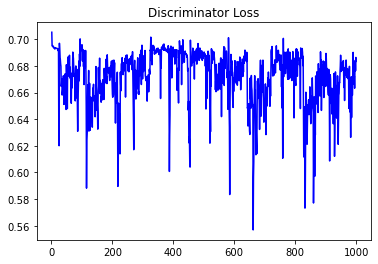

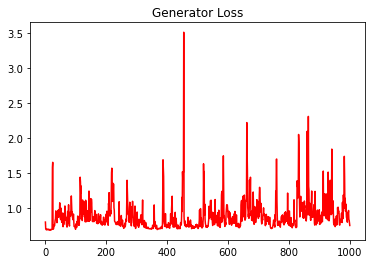

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.04083143771275297


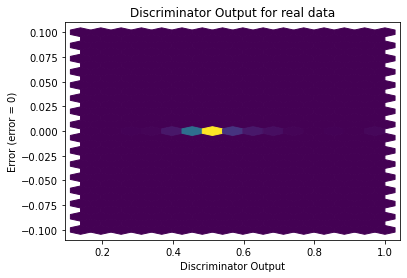

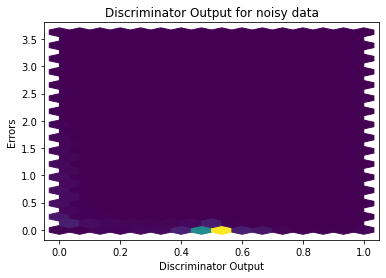

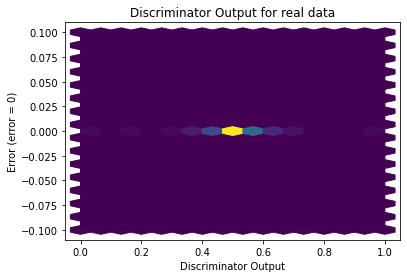

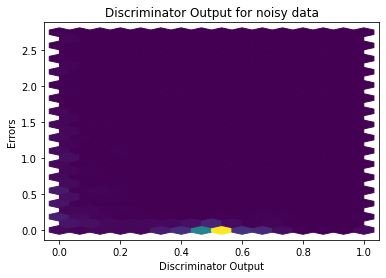

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())